<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valor-de-acoes---Investimentos-Itau-SA-ITSA4.SA-/blob/main/Prevendo_valor_de_a%C3%A7%C3%B5es_Investimentos_Ita%C3%BA_SA_(ITSA4_SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo valor de ações - `Investimentos Itaú/SA (ITSA4.SA)`**

**Introdução**

Criar um modelo de predição para estimar valores de ações. Nesse caso, as ações do [**ITSA4.SA**](https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA&.tsrc=fin-srch), utilizaremos a biblioteca  [`yfinance`](https://pypi.org/project/yfinance/) para carregar os dados diretamente do site [**Yahoo! Finance**](https://finance.yahoo.com/).

In [1]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# instalando a biblioteca 
!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.5 MB/s 
     |████████████████████████████████| 63 kB 684 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# importando a biblioteca para baixar os dados diretamente do site https://finance.yahoo.com/
import yfinance as yf

In [4]:
# importando o conjunto de dados (https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA&.tsrc=fin-srch)
data_ITAU = 'ITSA4.SA' # Itaúsa - Investimentos Itaú/SA

In [5]:
# instanciando o conjunto de dados no objeto "df"
df_ITAU = yf.download(data_ITAU).reset_index()

[*********************100%***********************]  1 of 1 completed


In [6]:
# visualizando o tipo do objeto criado
type(df_ITAU)

pandas.core.frame.DataFrame

In [7]:
# visualizando a data inicial e final
print(
    f'Data inicial: {df_ITAU.Date[:1]}',
    f'Data final: {df_ITAU.Date[-1:]}',
    sep='\n\n'
)

Data inicial: 0   2000-01-03
Name: Date, dtype: datetime64[ns]

Data final: 5617   2022-05-11
Name: Date, dtype: datetime64[ns]


In [8]:
# visualizando as 5 primeiras linhas da base de dados
df_ITAU.head().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.97,1.09,0.96,1.03,0.54,10799362.0
1,2000-01-04,1.00,1.00,0.93,0.93,0.49,12675326.0
2,2000-01-05,0.94,1.01,0.90,1.01,0.53,9621184.0
3,2000-01-06,1.01,1.03,1.00,1.03,0.54,24240133.0
4,2000-01-07,1.04,1.05,1.01,1.02,0.54,11776899.0


In [9]:
# visualizando as 5 últimas linhas da base de dados
df_ITAU.tail().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume
5613,2022-05-05,9.04,9.04,8.81,8.87,8.87,34292500.0
5614,2022-05-06,8.89,9.05,8.86,8.90,8.90,35341700.0
5615,2022-05-09,8.88,8.94,8.73,8.78,8.78,30162500.0
5616,2022-05-10,8.84,8.91,8.70,8.72,8.72,23248400.0
5617,2022-05-11,8.75,8.93,8.73,8.91,8.91,41411800.0


In [10]:
# informações gerais do conjunto de dados
df_ITAU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5618 non-null   datetime64[ns]
 1   Open       5617 non-null   float64       
 2   High       5617 non-null   float64       
 3   Low        5617 non-null   float64       
 4   Close      5617 non-null   float64       
 5   Adj Close  5617 non-null   float64       
 6   Volume     5617 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 307.4 KB


In [11]:
# instâncias únicas em cada atributo
df_ITAU.nunique()

Date         5618
Open         2995
High         2988
Low          3022
Close        2970
Adj Close    3775
Volume       5337
dtype: int64

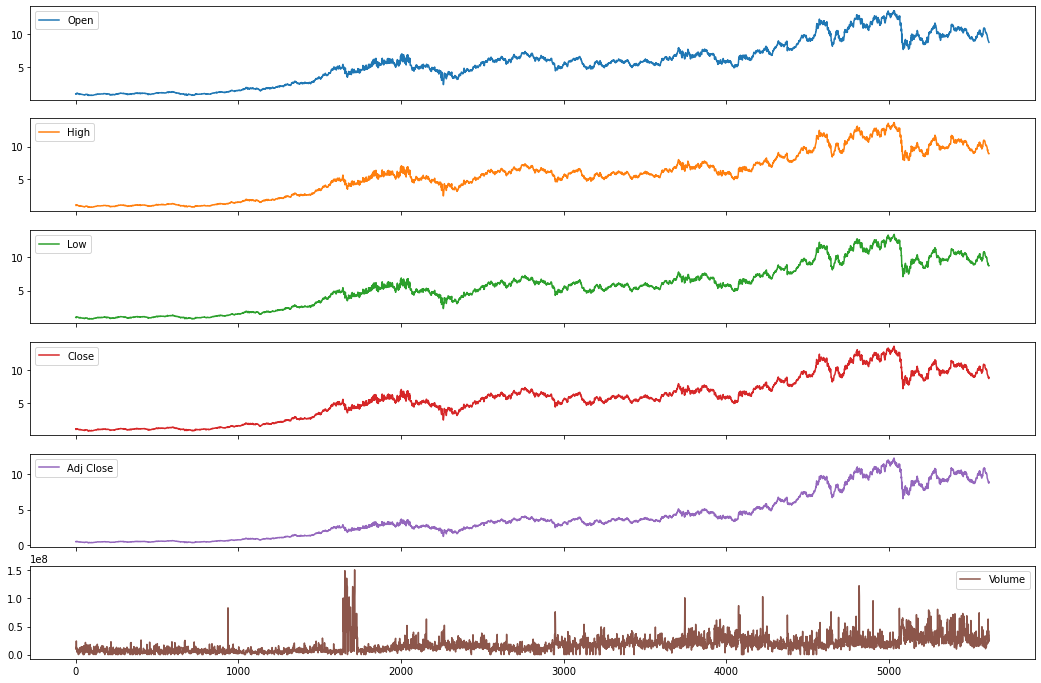

In [12]:
# instanciando as colunas de interesse
feats = (df_ITAU.columns[1:])

# plotando gráfico da série temporal
df_ITAU[feats].plot(subplots=True, figsize=(18,12));

In [13]:
# bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

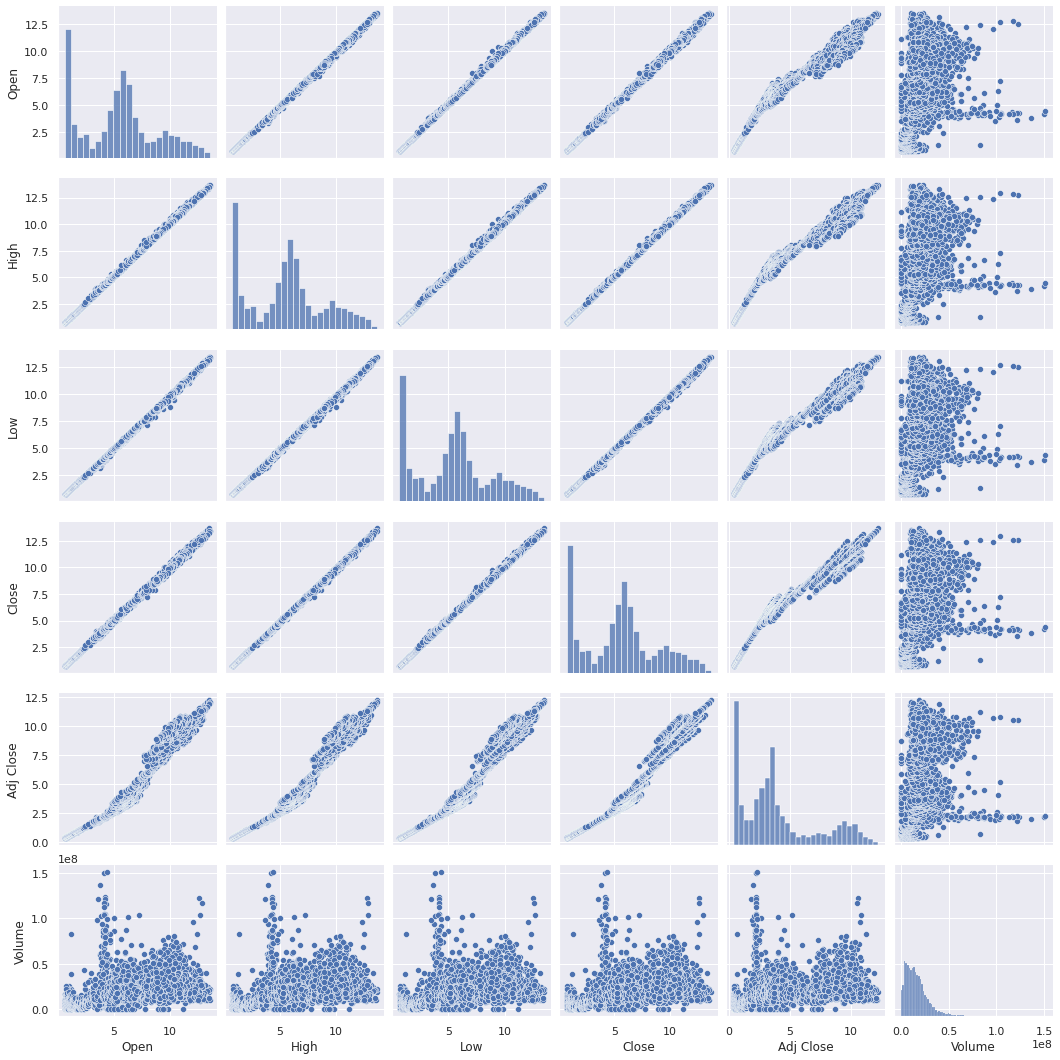

In [14]:
# plotando diversos gráficos dos dados dos atributos
sns.pairplot(df_ITAU);

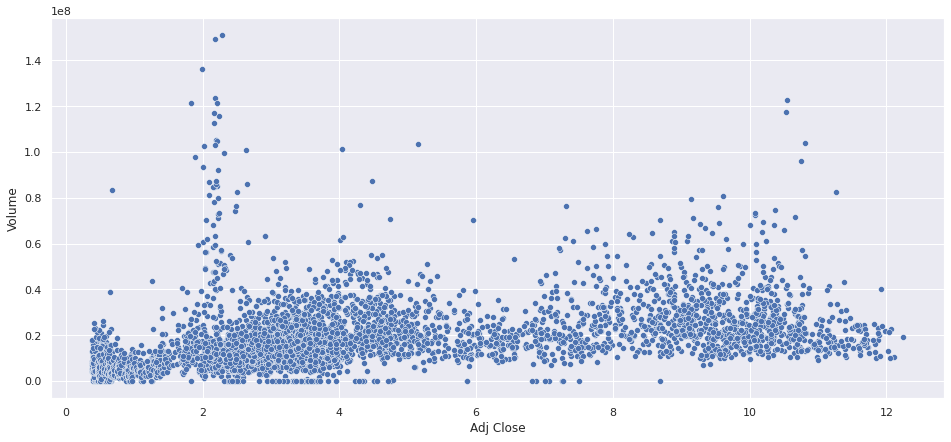

In [15]:
# gráfico de dispersão - "Adj Close" VS "Volume"
plt.figure(figsize=(16,7))
sns.scatterplot(data=df_ITAU, 
                x='Adj Close',
                y='Volume');

In [16]:
# correlação entre as variáveis
df_ITAU.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999760,0.999740,0.999474,0.967537,0.457514
High,0.999760,1.000000,0.999706,0.999766,0.967716,0.462138
Low,0.999740,0.999706,1.000000,0.999761,0.967907,0.453509
Close,0.999474,0.999766,0.999761,1.000000,0.967744,0.457832
Adj Close,0.967537,0.967716,0.967907,0.967744,1.000000,0.457362
Volume,0.457514,0.462138,0.453509,0.457832,0.457362,1.000000


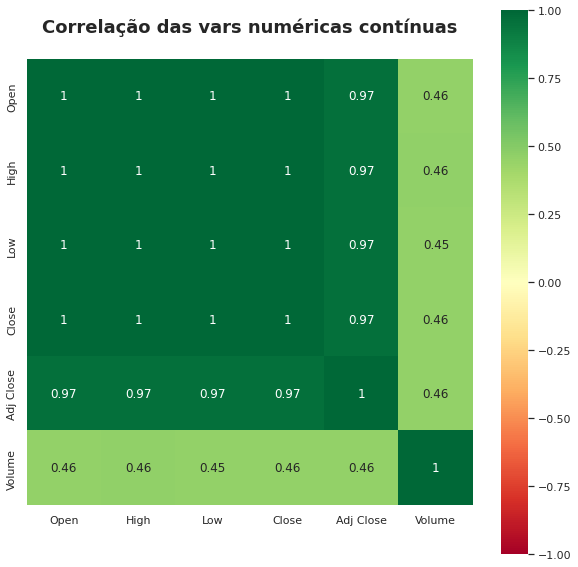

In [17]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize=(10,10))

sns.heatmap(df_ITAU.corr(), cmap='RdYlGn', vmin=-1.0, 
            annot=True, vmax=1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

In [18]:
# realizando um ponto de corte da correlação entre as variáveis somente maior e/ou igual a 0.5
vars_num_corr = df_ITAU.corr()['Adj Close'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.5].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Adj Close). \nSegue:')
important_feats

Há 5 atributos com forte correlação com a variável alvo (Adj Close). 
Segue:


Adj Close    1.000000
Low          0.967907
Close        0.967744
High         0.967716
Open         0.967537
Name: Adj Close, dtype: float64

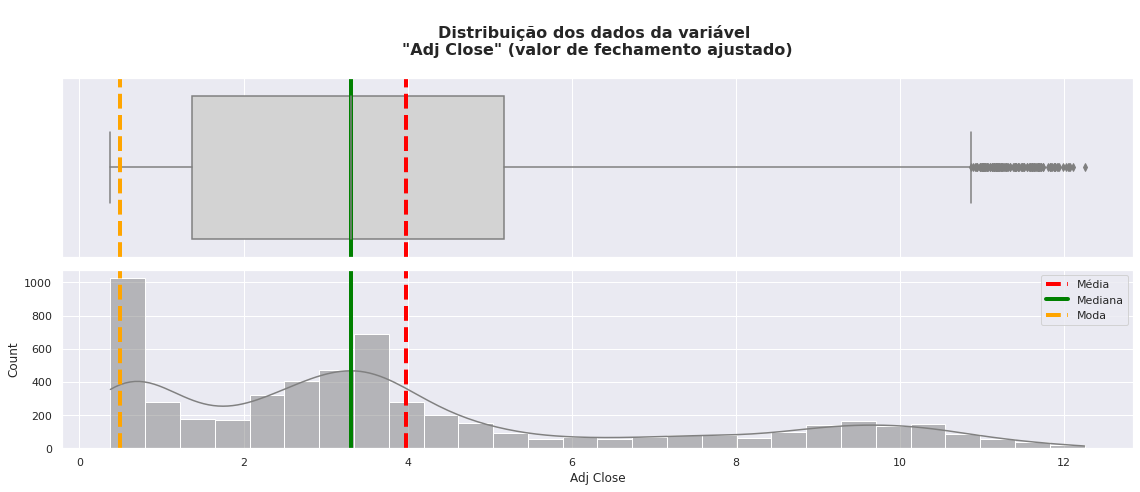

In [19]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Adj Close" (valor de fechamento ajustado)
mean = df_ITAU['Adj Close'].mean()
median = df_ITAU['Adj Close'].median()
mode = df_ITAU['Adj Close'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=df_ITAU, x='Adj Close', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Adj Close" (valor de fechamento ajustado)\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=df_ITAU, x='Adj Close', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [20]:
# instanciando os atributos "Date" e "Adj Close" na variável "df_close"
df_close_date = df_ITAU[['Date', 'Adj Close']]

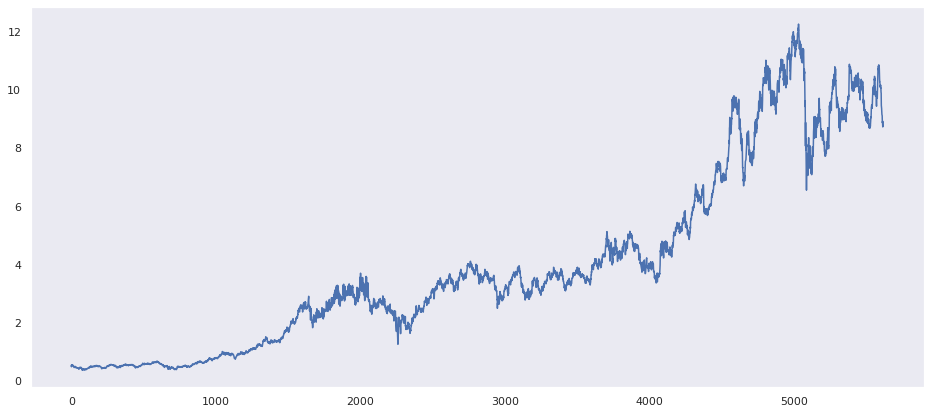

In [21]:
# gráfico de linha da série temporal
df_close_date['Adj Close'].plot(secondary_y=data_ITAU, figsize=(16,7));

In [22]:
# criando novos atributos para "Adj Close" (fechamento ajustado)
df_ITAU['5-day moving average'] = df_ITAU['Adj Close'].rolling(5).mean()      # média móvel de 5 dias
df_ITAU['15-day moving average'] = df_ITAU['Adj Close'].rolling(15).mean()    # média móvel de 15 dias
df_ITAU['30-day moving average'] = df_ITAU['Adj Close'].rolling(30).mean()    # média móvel de 30 dias
df_ITAU['45-day moving average'] = df_ITAU['Adj Close'].rolling(45).mean()    # média móvel de 45 dias
df_ITAU['60-day moving average'] = df_ITAU['Adj Close'].rolling(60).mean()    # média móvel de 60 dias

In [24]:
# visualizando os atributos criados
df_ITAU[['5-day moving average', '15-day moving average', '30-day moving average', 
         '45-day moving average', '60-day moving average']]

,5-day moving average,15-day moving average,30-day moving average,45-day moving average,60-day moving average
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,0.526587,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5613,9.092000,9.594667,10.084484,10.033812,NaN
5614,9.030000,9.515333,10.024888,10.012774,NaN
5615,8.956000,9.427333,9.957333,9.988410,NaN
5616,8.874000,9.331333,9.888000,9.965131,NaN


In [25]:
# contabilizando valores nulos presente na base de dados
df_ITAU.isnull().sum()

Date                       0
Open                       1
High                       1
Low                        1
Close                      1
Adj Close                  1
Volume                     1
5-day moving average       9
15-day moving average     29
30-day moving average     59
45-day moving average     89
60-day moving average    109
dtype: int64

In [26]:
# ajustando o valor de fechamento para o dia posterior
df_ITAU['Adj Close'] = df_ITAU['Adj Close'].shift(-1)

In [27]:
# visualizando a base da dados
df_ITAU

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,30-day moving average,45-day moving average,60-day moving average
0,2000-01-03,0.969856,1.089143,0.964670,1.032093,0.489090,10799362.0,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.995788,0.995788,0.933551,0.933551,0.529848,12675326.0,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.938738,1.011347,0.902433,1.011347,0.537999,9621184.0,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,1.006161,1.032093,1.000974,1.026906,0.535283,24240133.0,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,1.037279,1.052838,1.011347,1.021720,0.554302,11776899.0,0.526587,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5613,2022-05-05,9.040000,9.040000,8.810000,8.870000,8.900000,34292500.0,9.092000,9.594667,10.084484,10.033812,NaN
5614,2022-05-06,8.890000,9.050000,8.860000,8.900000,8.780000,35341700.0,9.030000,9.515333,10.024888,10.012774,NaN
5615,2022-05-09,8.880000,8.940000,8.730000,8.780000,8.720000,30162500.0,8.956000,9.427333,9.957333,9.988410,NaN
5616,2022-05-10,8.840000,8.910000,8.700000,8.720000,8.910000,23248400.0,8.874000,9.331333,9.888000,9.965131,NaN


In [28]:
# percentual de dados nulos/ausentes em relação ao total de dados da base
((df_ITAU.isnull().sum() / len(df_ITAU)) * 100).round(2)

Date                     0.00
Open                     0.02
High                     0.02
Low                      0.02
Close                    0.02
Adj Close                0.04
Volume                   0.02
5-day moving average     0.16
15-day moving average    0.52
30-day moving average    1.05
45-day moving average    1.58
60-day moving average    1.94
dtype: float64

In [29]:
# removendo valores nulos/ausentes da base de dados
df_ITAU.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
df_ITAU.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [31]:
# instanciando os atributos "Date", "Adj Close", "5-day moving average", "15-day moving average", 
# "30-day moving average", "45-day moving average" e "60-day moving average" na variável "df_close2"
df_close2 = df_ITAU[['Date', 'Adj Close', '5-day moving average', 
                     '15-day moving average', '30-day moving average', 
                     '45-day moving average', '60-day moving average']]

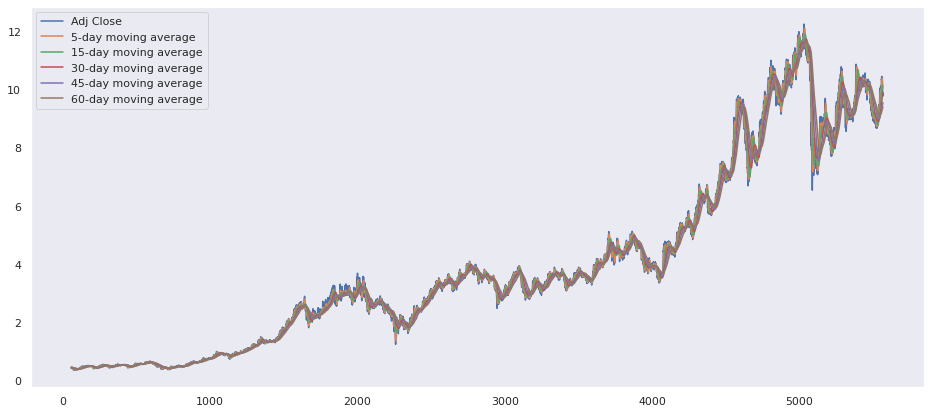

In [32]:
# gráfico de linha da série temporal
df_close2[['Adj Close', '5-day moving average', 
          '15-day moving average', '30-day moving average', 
           '45-day moving average', '60-day moving average']].plot(secondary_y=data_ITAU, figsize=(16,7));

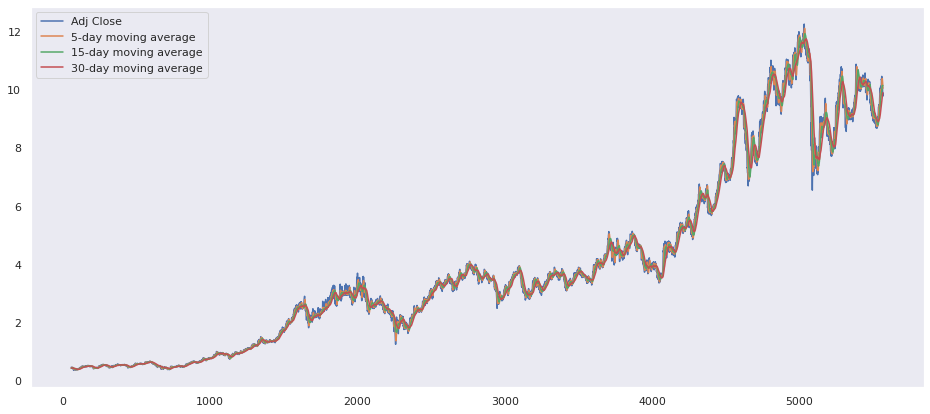

In [33]:
# gráfico de linha da série temporal
df_close2[['Adj Close', '5-day moving average', 
          '15-day moving average', '30-day moving average']].plot(secondary_y=data_ITAU, figsize=(16,7));

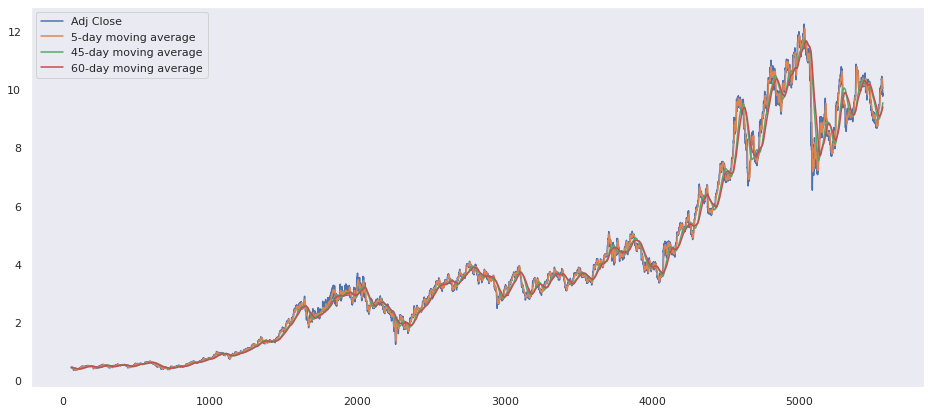

In [34]:
# gráfico de linha da série temporal
df_close2[['Adj Close', '5-day moving average', 
          '45-day moving average', '60-day moving average']].plot(secondary_y=data_ITAU, figsize=(16,7));

In [35]:
# dimensão da base de dados
df_ITAU.shape   # linhas e colunas

(5508, 12)

In [36]:
# separando a quantidade linhas de treino, validaçao e teste
linhas_df = df_ITAU.shape[0]

linhas_treino = round(linhas_df * 0.7)
linhas_validacao = round(linhas_df * 0.2)
linhas_teste = round(linhas_df * 0.1) - 1

print(
    'INFO:\n'
    f'- Linhas da base de dados: {linhas_df}',
    f'- Linhas de treino (70%) = {linhas_treino} | Índices = 0:{linhas_treino}', 
    f'- Linhas de validação (20%) =  {linhas_validacao} | Índices = {linhas_treino}:{linhas_treino + linhas_validacao}',
    f'- Linhas de teste (10%) = {linhas_teste} | Índices = {linhas_treino + linhas_validacao}:{linhas_df}',
    sep='\n'
)

INFO:
- Linhas da base de dados: 5508
- Linhas de treino (70%) = 3856 | Índices = 0:3856
- Linhas de validação (20%) =  1102 | Índices = 3856:4958
- Linhas de teste (10%) = 550 | Índices = 4958:5508


In [37]:
# instanciando a quantidade dos dados de treino, validação e teste
train_data = linhas_treino      # 3856
val_data = linhas_validacao     # 1102
test_data = linhas_teste        # 550

print(
    f'Qtde de dados de treino: {train_data}', 
    f'Qtde de dados de validação: {val_data}', 
    f'Qtde de dados de treino: {test_data}',
    sep='\n')

print('Total geral:', train_data + val_data + test_data)

Qtde de dados de treino: 3856
Qtde de dados de validação: 1102
Qtde de dados de treino: 550
Total geral: 5508


In [ ]:
# train_data = df_ITAU.iloc[0:linhas_treino]
# val_data = df_ITAU.iloc[3842:4940]
# test_data = df_ITAU.iloc[4940:5488]

# train_data.reset_index(drop=True, inplace=True)
# val_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)

# print('Dados para modelagem:' + str(train_data.shape))
# print('Dados para validação:' + str(val_data.shape))
# print('Dados para teste do modelo:' + str(test_data.shape))

In [ ]:
# display(
#     train_data.head(),
#     val_data.head(),
#     test_data.head()
# )

In [38]:
# reindexando a base de dados
df_ITAU = df_ITAU.reset_index(drop=True)
df_ITAU

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,30-day moving average,45-day moving average,60-day moving average
0,2000-03-24,0.855755,0.902433,0.855755,0.897247,0.472787,21573697.0,0.441812,0.435291,0.446250,0.459202,0.477678
1,2000-03-27,0.902433,0.912806,0.897247,0.902433,0.464636,11938726.0,0.451050,0.436921,0.446612,0.458598,0.476546
2,2000-03-28,0.897247,0.902433,0.876501,0.886874,0.456485,7430897.0,0.458115,0.438008,0.446884,0.457813,0.476139
3,2000-03-29,0.897247,0.897247,0.860942,0.871315,0.456485,4762340.0,0.460832,0.439276,0.446431,0.456907,0.474916
4,2000-03-30,0.876501,0.881687,0.855755,0.871315,0.461918,4671777.0,0.464093,0.440363,0.445797,0.456122,0.473557
...,...,...,...,...,...,...,...,...,...,...,...,...
5503,2022-02-18,10.510000,10.580000,10.470000,10.520000,10.060155,22173900.0,10.377429,10.136353,9.779383,9.450203,9.344564
5504,2022-02-21,10.530000,10.530000,10.150000,10.210000,10.079861,24135400.0,10.324222,10.137667,9.817369,9.474068,9.358282
5505,2022-02-22,10.220000,10.390000,10.130000,10.230000,9.932062,24782200.0,10.249337,10.138981,9.851155,9.501866,9.375399
5506,2022-02-23,10.250000,10.320000,10.030000,10.080000,9.774411,21574000.0,10.150805,10.141608,9.880985,9.528231,9.390207


In [39]:
# instanciando as variáveis explicativas (X) e a variável resposta (y)
X = df_ITAU.drop(['Date', 'Adj Close'], axis=1)
y = df_ITAU['Adj Close']

# tamanho das variáveis
len(X), len(y)

(5508, 5508)

In [40]:
# biblioteca para matemática
import numpy as np

# visualizando os 5 primeiros dados da variável X e y
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head()}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
       Open      High       Low     Close      Volume  5-day moving average  \
0  0.855755  0.902433  0.855755  0.897247  21573697.0              0.441812   
1  0.902433  0.912806  0.897247  0.902433  11938726.0              0.451050   
2  0.897247  0.902433  0.876501  0.886874   7430897.0              0.458115   
3  0.897247  0.897247  0.860942  0.871315   4762340.0              0.460832   
4  0.876501  0.881687  0.855755  0.871315   4671777.0              0.464093   

   15-day moving average  30-day moving average  45-day moving average  \
0               0.435291               0.446250               0.459202   
1               0.436921               0.446612               0.458598   
2               0.438008               0.446884               0.457813   
3               0.439276               0.446431               0.456907   
4               0.440363               0.445797               0.456122   

   60-day moving 

In [41]:
# função para escolher os melhores atributos
from sklearn.feature_selection import SelectKBest

# instanciando o objeto
k_best_feats = SelectKBest(k='all')

In [42]:
# criando uma lista com os atributos da variável explicativas
feats_list = list(X.columns)
print(feats_list)

['Open', 'High', 'Low', 'Close', 'Volume', '5-day moving average', '15-day moving average', '30-day moving average', '45-day moving average', '60-day moving average']


In [43]:
# treinando e transformando com o objeto os dados da variável explicativa
k_best_feats.fit_transform(X, y)

# instanciando as melhores métricas
k_best_feats_scores = k_best_feats.scores_

In [44]:
# concatenando os atributos e seus respectivos valores (peso de importância)
raw_pairs = zip(feats_list[1:], k_best_feats_scores)

# ordenando a lista de maior para o menor valores (peso de importância)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [45]:
# instanciando a lista com os pesos da importância dos atributos em um dicionário
k_best_feats_final = dict(ordered_pairs[:15])
best_feats = k_best_feats_final.keys()

# imprimindo os resultados
print(
    'Melhores atributos (features):\n'
    f'{k_best_feats_final}'
)

Melhores atributos (features):
{'15-day moving average': 2653.0763110685675, '30-day moving average': 1721.2649542974877, 'Volume': 1649.5191194106696, 'Low': 1478.4490446961338, 'Close': 1443.8069351645797, '45-day moving average': 1423.7320052385967, '60-day moving average': 1302.364007451244, 'High': 1169.7887911844325, '5-day moving average': 4.267234170860785}


In [46]:
# nome das colunas
df_ITAU.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '5-day moving average', '15-day moving average',
       '30-day moving average', '45-day moving average',
       '60-day moving average'],
      dtype='object')

In [47]:
# atributos com maior grau de importância
best_feats

dict_keys(['15-day moving average', '30-day moving average', 'Volume', 'Low', 'Close', '45-day moving average', '60-day moving average', 'High', '5-day moving average'])

In [48]:
list(k_best_feats_final)

['15-day moving average',
 '30-day moving average',
 'Volume',
 'Low',
 'Close',
 '45-day moving average',
 '60-day moving average',
 'High',
 '5-day moving average']

In [49]:
# instanciando os atributos com maior importância
feats_importance = df_ITAU.drop(['Date', 'Open', 'Adj Close', 
                                 '5-day moving average'], axis=1)

# visualizando os atributos selecionados
feats_importance

,High,Low,Close,Volume,15-day moving average,30-day moving average,45-day moving average,60-day moving average
0,0.902433,0.855755,0.897247,21573697.0,0.435291,0.446250,0.459202,0.477678
1,0.912806,0.897247,0.902433,11938726.0,0.436921,0.446612,0.458598,0.476546
2,0.902433,0.876501,0.886874,7430897.0,0.438008,0.446884,0.457813,0.476139
3,0.897247,0.860942,0.871315,4762340.0,0.439276,0.446431,0.456907,0.474916
4,0.881687,0.855755,0.871315,4671777.0,0.440363,0.445797,0.456122,0.473557
...,...,...,...,...,...,...,...,...
5503,10.580000,10.470000,10.520000,22173900.0,10.136353,9.779383,9.450203,9.344564
5504,10.530000,10.150000,10.210000,24135400.0,10.137667,9.817369,9.474068,9.358282
5505,10.390000,10.130000,10.230000,24782200.0,10.138981,9.851155,9.501866,9.375399
5506,10.320000,10.030000,10.080000,21574000.0,10.141608,9.880985,9.528231,9.390207


In [50]:
# normalizando os dados de entradas da seleção dos atributos acima

# biblioteca para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando o objeto e realizando o treinamento da normalização dos dados da variável "feats_importance"
scaler = MinMaxScaler()
feats_scaled = scaler.fit_transform(feats_importance)

print(
    f'Dados normalizados: {feats_scaled.shape[0]} linhas e {feats_scaled.shape[1]} colunas.',
    feats_scaled,
    sep='\n\n'
)

Dados normalizados: 5508 linhas e 8 colunas.

[[0.01241185 0.01220573 0.0136213  ... 0.00443046 0.00480347 0.0053916 ]
 [0.01321264 0.01546065 0.01402189 ... 0.00446239 0.00475004 0.00529101]
 [0.01241185 0.01383319 0.01282003 ... 0.00448634 0.00468058 0.0052548 ]
 ...
 [0.74483988 0.73974264 0.73453337 ... 0.83335382 0.80498409 0.79593672]
 [0.73943592 0.73189791 0.72294659 ... 0.83598299 0.80731712 0.79725231]
 [0.71164441 0.70757938 0.71058734 ... 0.83740672 0.8094548  0.79853902]]


In [51]:
# quantidade de dados da variável "feats_scaled"
len(feats_scaled)

5508

In [52]:
# instanciando os dados de treino e validação 
X_train = feats_scaled[0:3842]
X_val = feats_scaled[3842:4940]

y_train = y[0:3842]
y_val = y[3842:4940]

print(
    '\tDados',
    '\n++++++++++++++++++++'
    '\n             X | y'
    '\nTreino   :', len(X_train), len(y_train), 
    '\nValidação:', len(X_val), len(y_val)
)

	Dados 
++++++++++++++++++++
             X | y
Treino   : 3842 3842 
Validação: 1098 1098


In [53]:
print(
    '5 amostras dos dados de treino',
    f'X: \n{X_train[:5]}',
    f'y: \n{y_train[:5]}',
    sep='\n\n'
)

5 amostras dos dados de treino

X: 
[[0.01241185 0.01220573 0.0136213  0.14281383 0.0035515  0.00443046
  0.00480347 0.0053916 ]
 [0.01321264 0.01546065 0.01402189 0.07903213 0.00369293 0.00446239
  0.00475004 0.00529101]
 [0.01241185 0.01383319 0.01282003 0.04919115 0.00378722 0.00448634
  0.00468058 0.0052548 ]
 [0.0120115  0.01261263 0.01161817 0.0315258  0.00389723 0.00444642
  0.00460043 0.00514616]
 [0.01081029 0.01220573 0.01161817 0.03092629 0.00399151 0.00439054
  0.00453097 0.00502546]]

y: 
0    0.472787
1    0.464636
2    0.456485
3    0.456485
4    0.461918
Name: Adj Close, dtype: float64


In [54]:
print(
    '5 amostras dos dados de validação',
    f'X: \n{X_val[:5]}',
    f'y: \n{y_val[:5]}',
    sep='\n\n'
)

5 amostras dos dados de validação

X: 
[[0.48420171 0.47259068 0.48428493 0.20034405 0.36255537 0.38304894
  0.39127267 0.39154298]
 [0.48420171 0.48240493 0.47582903 0.14350164 0.36215053 0.38182268
  0.3905001  0.3912404 ]
 [0.49627428 0.48240493 0.49213683 0.16995151 0.36189698 0.38116074
  0.39001255 0.39117339]
 [0.48963434 0.48792549 0.48307698 0.14088223 0.36134282 0.38017851
  0.38941815 0.390998  ]
 [0.48903071 0.49160584 0.48609695 0.12879091 0.36183844 0.37907456
  0.38872651 0.39087502]]

y: 
3842    4.570511
3843    4.710742
3844    4.632837
3845    4.658805
3846    4.658805
Name: Adj Close, dtype: float64


In [55]:
# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
l_reg = LinearRegression()

# realizando o treinamento e a predição com o modelo instanciado
l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Regressão Linear',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Regressão Linear 
Coeficiente de determinação: 96.87%


In [58]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo
mlp_reg = MLPRegressor(max_iter=300, random_state=42)

# realizando o treinamento e a predição com o modelo instanciado
mlp_reg.fit(X_train, y_train)
pred = mlp_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Rede Neural Simples',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Rede Neural Simples 
Coeficiente de determinação: 67.36%


In [59]:
# instanciando um dicionário com hiperparâmetros
params = {
    'hidden_layer_sizes': [(i, ) for i in list(range(1, 21))],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# visualizando os dados do dicionário instanciado
params

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,),
  (14,),
  (15,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [60]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo com 300 iterações
mlp_reg = MLPRegressor(max_iter=300, random_state=42)

# função de procura dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# instanciando o objeto "search" e aplicando a função "GridSearchCV" com os seguintes argumentos:
# modelo instanciado, dicionário de parâmetros, número de núcleos , validação cruzada
search = GridSearchCV(mlp_reg, params, n_jobs=-1, cv=5)

# visualizando o objeto com seus parâmetros
search

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=300, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [61]:
# realizando o treinamento do obejto "search" com os dados de treino (X_train, y_train)
search.fit(X_train, y_train)

# instanciando os melhores parâmetros
clf = search.best_estimator_
print(clf)  # visualizando o resultado dos melhores parâmetros

# realizando a predição com os dados de validação (X_val)
pred = search.predict(X_val)

# realizando avalição do modelo com os dados de validação (X_val, y_val)
eval_model = search.score(X_val, y_val)

# visualizando o resultado
print(
    '\nModelo de Rede Neural Complexa',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

MLPRegressor(activation='tanh', hidden_layer_sizes=(12,), max_iter=300,
             random_state=42, solver='lbfgs')

Modelo de Rede Neural Complexa 
Coeficiente de determinação: 47.69%


In [65]:
len(feats_scaled), linhas_treino, linhas_validacao, linhas_teste

(5508, 3856, 1102, 550)

In [69]:
dados_teste = feats_scaled[-linhas_teste:]
len(dados_teste)

550

In [70]:
linhas_treino + linhas_validacao

4958

In [84]:
# # utilizando o modelo que apresentou melhor coeficiente de determinação nos dados de teste
# previsao = feats_scaled[4958:5509]
# # previsao = feats_scaled[-linhas_teste:]

# data_pregao_full = df_ITAU['Date']
# data_pregao = data_pregao_full[4958:5509]
# # data_pregao = data_pregao_full[-linhas_teste:]

# resp_full = df_ITAU['Adj Close']
# resp = resp_full[4958:5509]
# # resp = resp_full[-linhas_teste:]

# # função de regressão linear
# from sklearn.linear_model import LinearRegression

# # instanciando o modelo
# model = LinearRegression()

# # model = MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(4,), 
# #                      learning_rate='adaptive', max_iter=2000, solver='lbfgs')

# model.fit(X_train, y_train)

# print(
#     '\tScore',
#     f'Dados de treino: {model.score(X_train, y_train):.4f}',
#     f'Dados de validação: {model.score(X_val, y_val):.4f}\n',
#     sep='\n'
#     )

# pred_final = model.predict(previsao)

# import pandas as pd

# df = pd.DataFrame({
#     'Date': data_pregao,
#     'real': resp,
#     'previsao': pred_final
# })

# df['real'] = df['real'].shift(+1)

# df.set_index('Date', inplace=True)
# df.round(4).tail(20)

In [82]:
# utilizando o modelo que apresentou melhor coeficiente de determinação nos dados de teste
# previsao = feats_scaled[4958:5509]
previsao = feats_scaled[-linhas_teste:]

data_pregao_full = df_ITAU['Date']
# data_pregao = data_pregao_full[4958:5509]
data_pregao = data_pregao_full[-linhas_teste:]

resp_full = df_ITAU['Adj Close']
# resp = resp_full[4958:5509]
resp = resp_full[-linhas_teste:]

# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
model = LinearRegression()

# model = MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(4,), 
#                      learning_rate='adaptive', max_iter=2000, solver='lbfgs')

model.fit(X_train, y_train)

print(
    '\tScore',
    f'Dados de treino: {model.score(X_train, y_train):.4f}',
    f'Dados de validação: {model.score(X_val, y_val):.4f}\n',
    sep='\n'
    )

pred_final = model.predict(previsao)

import pandas as pd

df = pd.DataFrame({
    'Date': data_pregao,
    'real': resp,
    'previsao': pred_final
})

df['real'] = df['real'].shift(+1)

df.set_index('Date', inplace=True)
df.round(4).tail(20)

	Score
Dados de treino: 0.9939
Dados de validação: 0.9687



,real,previsao
Date,,
2022-01-28,9.9222,9.0551
2022-01-31,10.0404,9.1156
2022-02-01,10.0602,9.1915
2022-02-02,9.8927,9.1589
2022-02-03,9.9222,9.2538
2022-02-04,10.1193,9.3184
2022-02-07,9.9813,9.2551
2022-02-08,10.0010,9.3666
2022-02-09,9.8335,9.2914


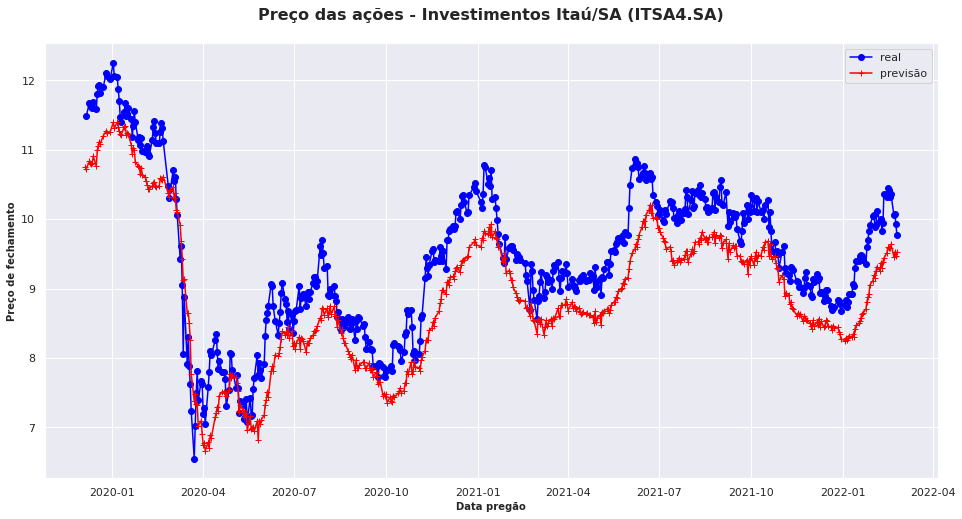

In [85]:
# gráfico dos dados reais e preditos
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos Itaú/SA (ITSA4.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df['real'], label='real', color='blue', marker='o')
plt.plot(df['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();

In [86]:
# criando uma cópia do dataframe e instanciando no objeto "df2"
df2 = df.copy()
df2

,real,previsao
Date,,
2019-12-05,NaN,10.752274
2019-12-06,11.484549,10.726546
2019-12-09,11.672258,10.832582
2019-12-10,11.655194,10.805727
2019-12-11,11.621063,10.802955
...,...,...
2022-02-18,10.365605,9.640457
2022-02-21,10.060155,9.459676
2022-02-22,10.079861,9.528994


In [87]:
# resetando o índice
df2.reset_index(inplace=True)
df2

,Date,real,previsao
0,2019-12-05,NaN,10.752274
1,2019-12-06,11.484549,10.726546
2,2019-12-09,11.672258,10.832582
3,2019-12-10,11.655194,10.805727
4,2019-12-11,11.621063,10.802955
...,...,...,...
545,2022-02-18,10.365605,9.640457
546,2022-02-21,10.060155,9.459676
547,2022-02-22,10.079861,9.528994
548,2022-02-23,9.932062,9.463406


In [88]:
# instanciando o recorte de tempo no df3
df3 = df2.loc['2020':] # de 2020 em diante
df3

,Date,real,previsao
203,2020-09-30,7.721112,7.449502
204,2020-10-01,7.808851,7.480606
205,2020-10-02,7.826399,7.356028
206,2020-10-05,7.861495,7.434249
207,2020-10-06,7.879041,7.375147
...,...,...,...
545,2022-02-18,10.365605,9.640457
546,2022-02-21,10.060155,9.459676
547,2022-02-22,10.079861,9.528994
548,2022-02-23,9.932062,9.463406


In [89]:
# visualizando o tipo de dados dos atributos
df3.dtypes

Date        datetime64[ns]
real               float64
previsao           float64
dtype: object

In [90]:
# resetando o índice
df3 = df3.set_index(pd.DatetimeIndex(
    df3['Date'].values
))

# visualizando
df3.head()

,Date,real,previsao
2020-09-30,2020-09-30,7.721112,7.449502
2020-10-01,2020-10-01,7.808851,7.480606
2020-10-02,2020-10-02,7.826399,7.356028
2020-10-05,2020-10-05,7.861495,7.434249
2020-10-06,2020-10-06,7.879041,7.375147


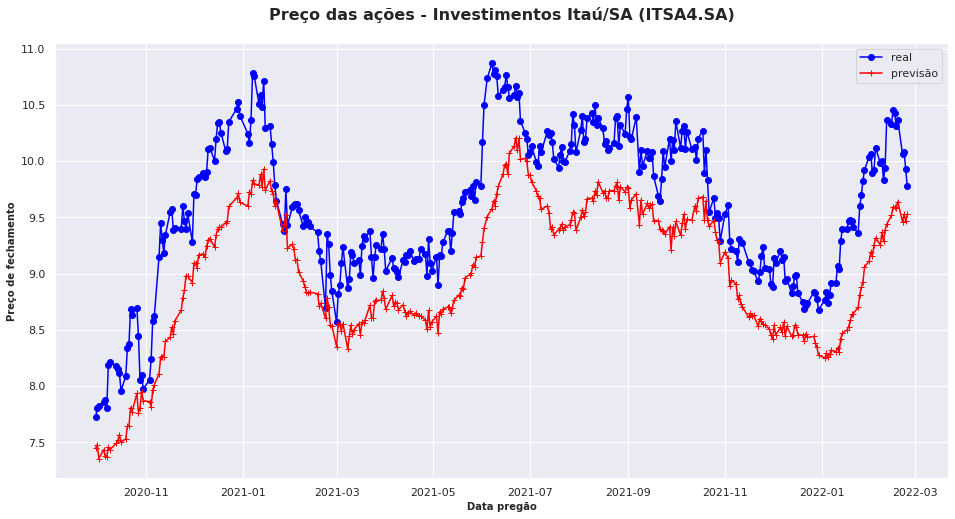

In [91]:
# plotando o gráfico do recorte da série temporal
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos Itaú/SA (ITSA4.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df3['real'], label='real', color='blue', marker='o')
plt.plot(df3['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();